##***Importing some packages***
First, we import some Python packages that will help us analyzing the data, especially pandas for data analysis and matplotlib for visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings
from collections import Counter
import datetime
import json
from matplotlib import rcParams

###Hiding warnings for cleaner display

In [ ]:
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# to get interactive plots
#%matplotlib notebook

##**Reading the dataset**
we read the dataset file which is in csv format

In [ ]:
df = pd.read_csv("/content/Dataset - dataset - Sheet1.csv")

In [ ]:
import wordcloud

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

###**Getting a feel of the dataset**
Let's get a feel of our dataset by displaying its first few rows

In [ ]:
df.head()


IMAGE ID  time stamp  likes  no.of comments  \
0   2001_1  09-05-2022  15773            3831   
1   2002_1  26-01-2021  76728             257   
2   2001_2  29-04-2022  55143             381   
3   2002_2  16-11-2020  89229             267   
4   2001_3  19-03-2022  97482             319   

                                       post_Metadata  \
0  Gold_choker\nKurta\nThe whole_lehenga \nKamarb...   
1  TopinOff_White RodebjerLinnSilk  SweetShirtsWo...   
2  Tshirt\nSkirt\nHeels\nBag\n\nRibbed cardigan\n...   
3                     partywear gagra_with_bellhands   
4      Embroidered Lehangaand and blouse set lehanga   

                                  post link  
0  https://www.instagram.com/p/CgTev_mp_fD/  
1  https://www.instagram.com/p/CJvy5magLo-/  
2  https://www.instagram.com/p/Cc74SOuJAkw/  
3  https://www.instagram.com/p/CHpk2PoAXOy/  
4  https://www.instagram.com/p/CbR8k0RpIN_/

Now, let's see some information about our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IMAGE ID        464 non-null    object
 1   time stamp      464 non-null    object
 2   likes           464 non-null    int64 
 3   no.of comments  464 non-null    int64 
 4   post_Metadata   464 non-null    object
 5   post link       464 non-null    object
dtypes: int64(2), object(4)
memory usage: 21.9+ KB


We can see that there are 464 entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 464 non-null entries) .

In [ ]:
df[df["no.of comments"].apply(lambda x: pd.isna(x))].head(3)

Empty DataFrame
Columns: [IMAGE ID, time stamp, likes, no.of comments, post_Metadata, post link]
Index: []

In [ ]:
df["time stamp"]=pd.to_datetime(df["time stamp"])

In [ ]:
cdf=df.groupby(df['time stamp'].dt.year)['IMAGE ID'].count().reset_index()
cdf

time stamp  IMAGE ID
0        2020        21
1        2021        55
2        2022       388

###**Dataset collection years**
Let's see in which years the dataset was collected

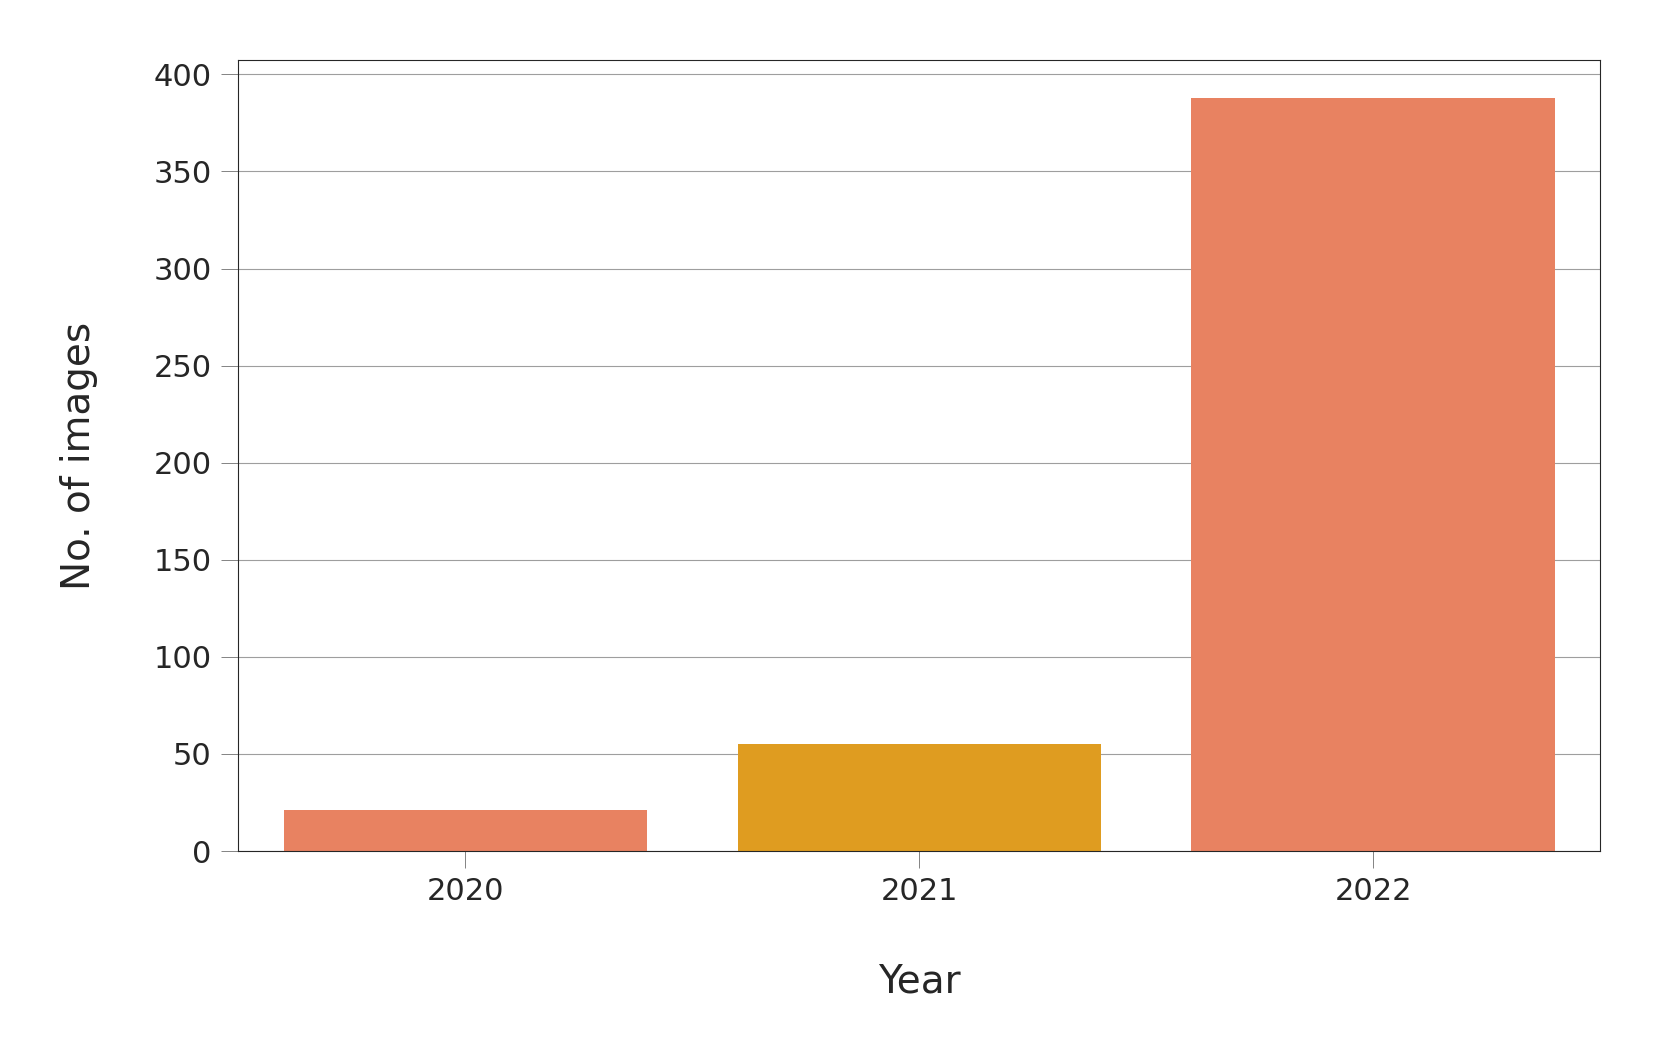

In [ ]:
fig, ax = plt.subplots()
_ = sns.barplot(x="time stamp", y="IMAGE ID", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of images")

In [ ]:
df.dtypes

IMAGE ID                  object
time stamp        datetime64[ns]
likes                      int64
no.of comments             int64
post_Metadata             object
post link                 object
dtype: object

In [ ]:
df.shape

(464, 6)

###**Describtion of numerical columns**
Now, let's see some statistical information about the numerical columns of our dataset

In [ ]:
df.describe()

likes  no.of comments
count     464.00          464.00
mean   127300.17          698.04
std    371476.72         1598.93
min        87.00            0.00
25%      1505.25            6.00
50%      3516.00           35.50
75%     31157.50          248.00
max   3700000.00        11300.00

We note from the table above that 
The average number of likes of a product is 127300
Average comment count is 698
It is useful for the trending product identification.

###**Most common words in meta data**
Let's see if there are some words that are used significantly in metadata. We will display the 25 most common words in all the metadata

In [ ]:
title_words = list(df["post_Metadata"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
data=Counter(title_words).most_common(25)

In [ ]:
data

[('with', 84),
 ('and', 30),
 ('saree', 23),
 ('for', 21),
 ('a', 20),
 ('Long', 18),
 ('suit', 17),
 ('lehenga', 17),
 ('in', 16),
 ('Short', 16),
 ('dupatta', 15),
 ('black', 14),
 ('Kurta', 13),
 ('women', 13),
 ('ShortNecklace', 13),
 ('Lehenga', 12),
 ('dress', 12),
 ('Men', 12),
 ('Haram', 12),
 ('long', 11),
 ('kurta', 11),
 ('the', 11),
 ('bridal', 11),
 ('pink', 10),
 ('White', 10)]

###**WORD CLOUD** 
Let's draw a word cloud for the metadata of our trending posts, which is a way to visualize most common words in the metadata; the more common the word is, the bigger its font size and we can say that is the trending product 

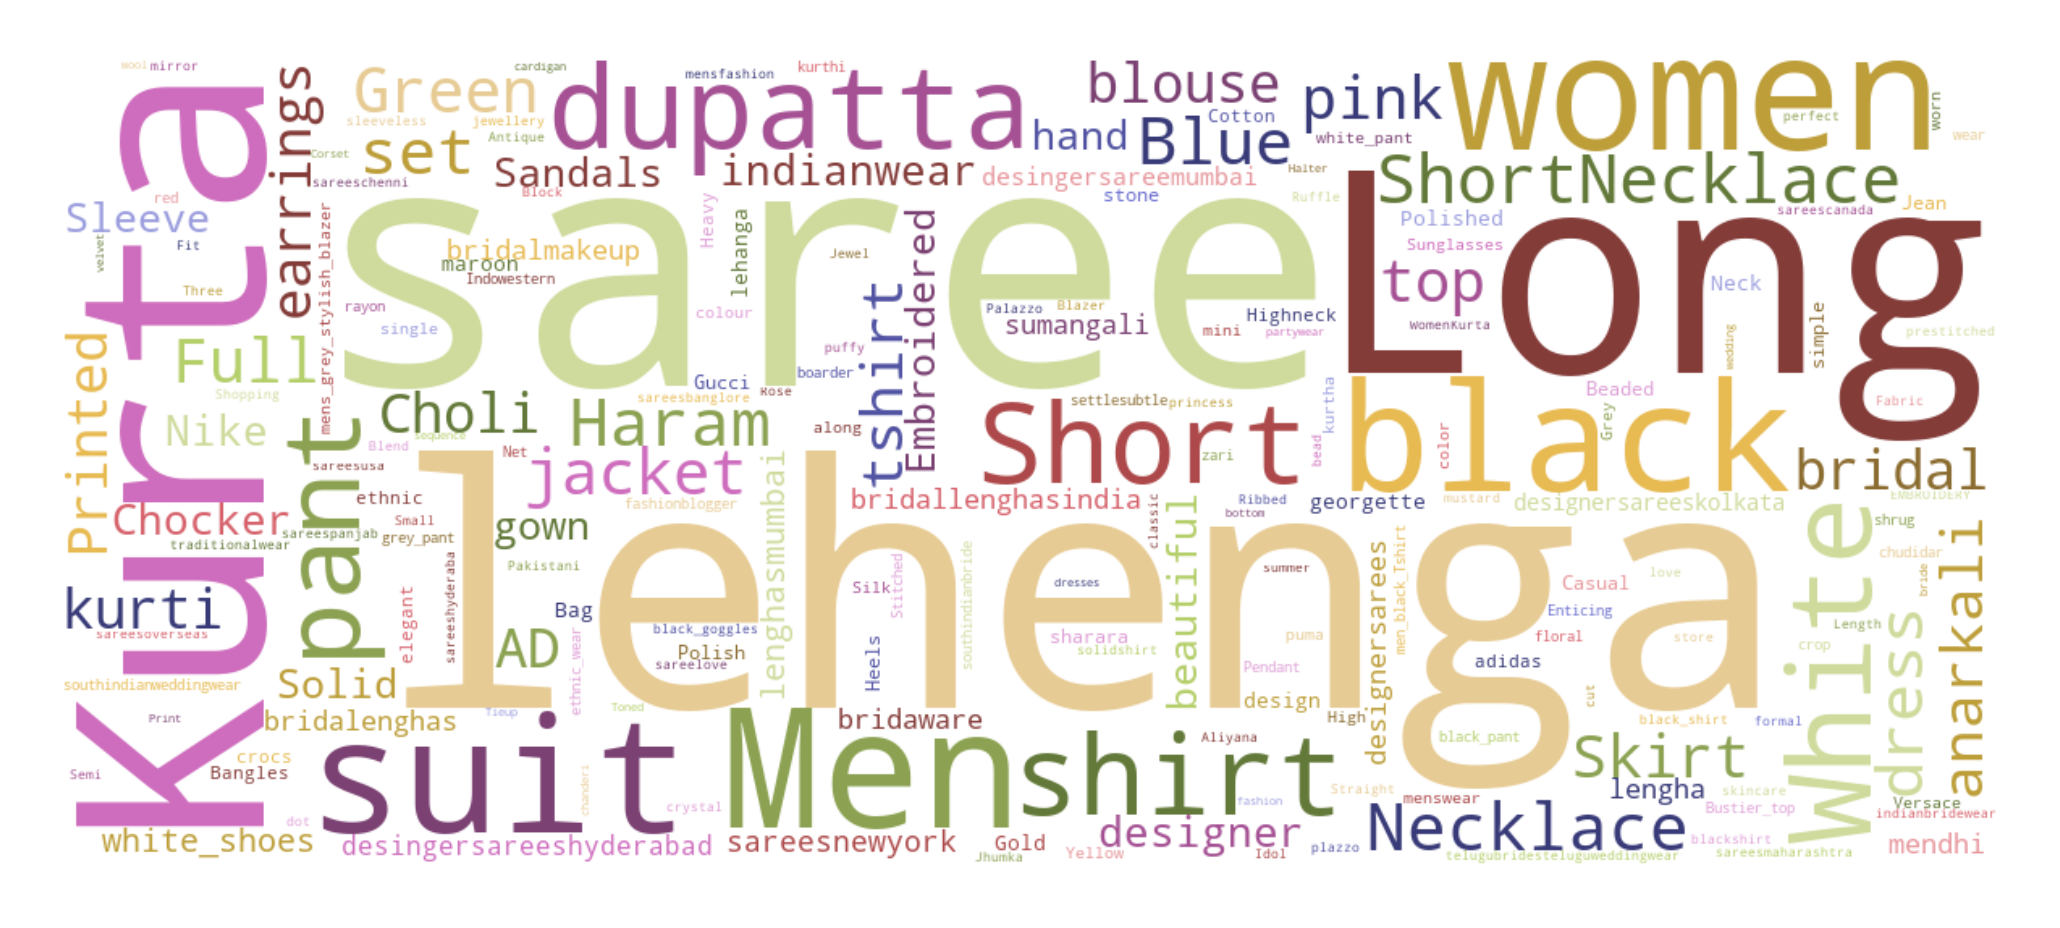

In [ ]:
import wordcloud
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

#####Here we remove the stopwords which are non keywords

In [ ]:
all_headlines = ' '.join(df['post_Metadata'].str.lower())
stopwords = STOPWORDS
stopwords.add('.')
stopwords.add(',')
stopwords.add('look')
stopwords.add('work')
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_headlines)

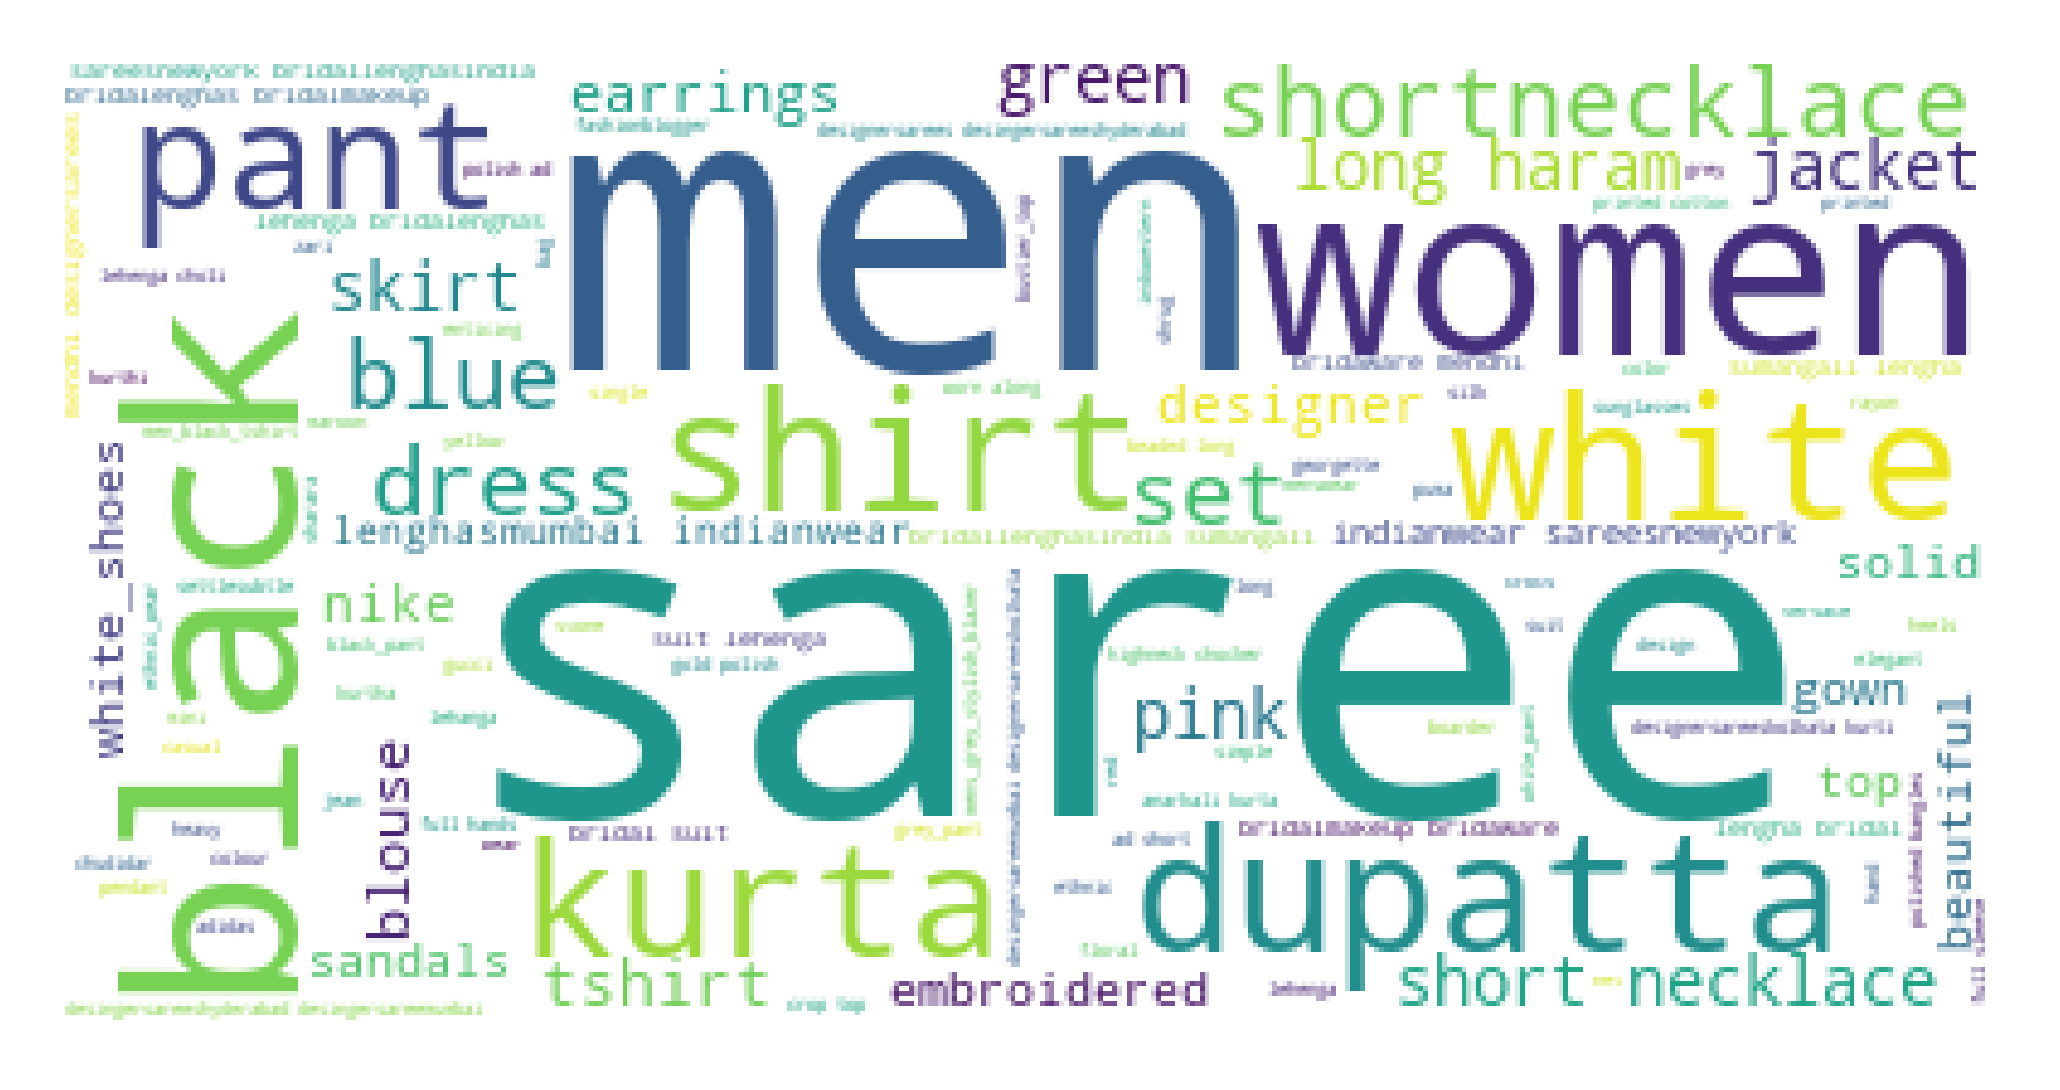

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##here we filter the keywords from all words


In [ ]:
filtered_words = [word for word in all_headlines.split() if word not in stopwords]
counted_words = Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count) 

#the plot represents the count of top keywords

<BarContainer object of 10 artists>

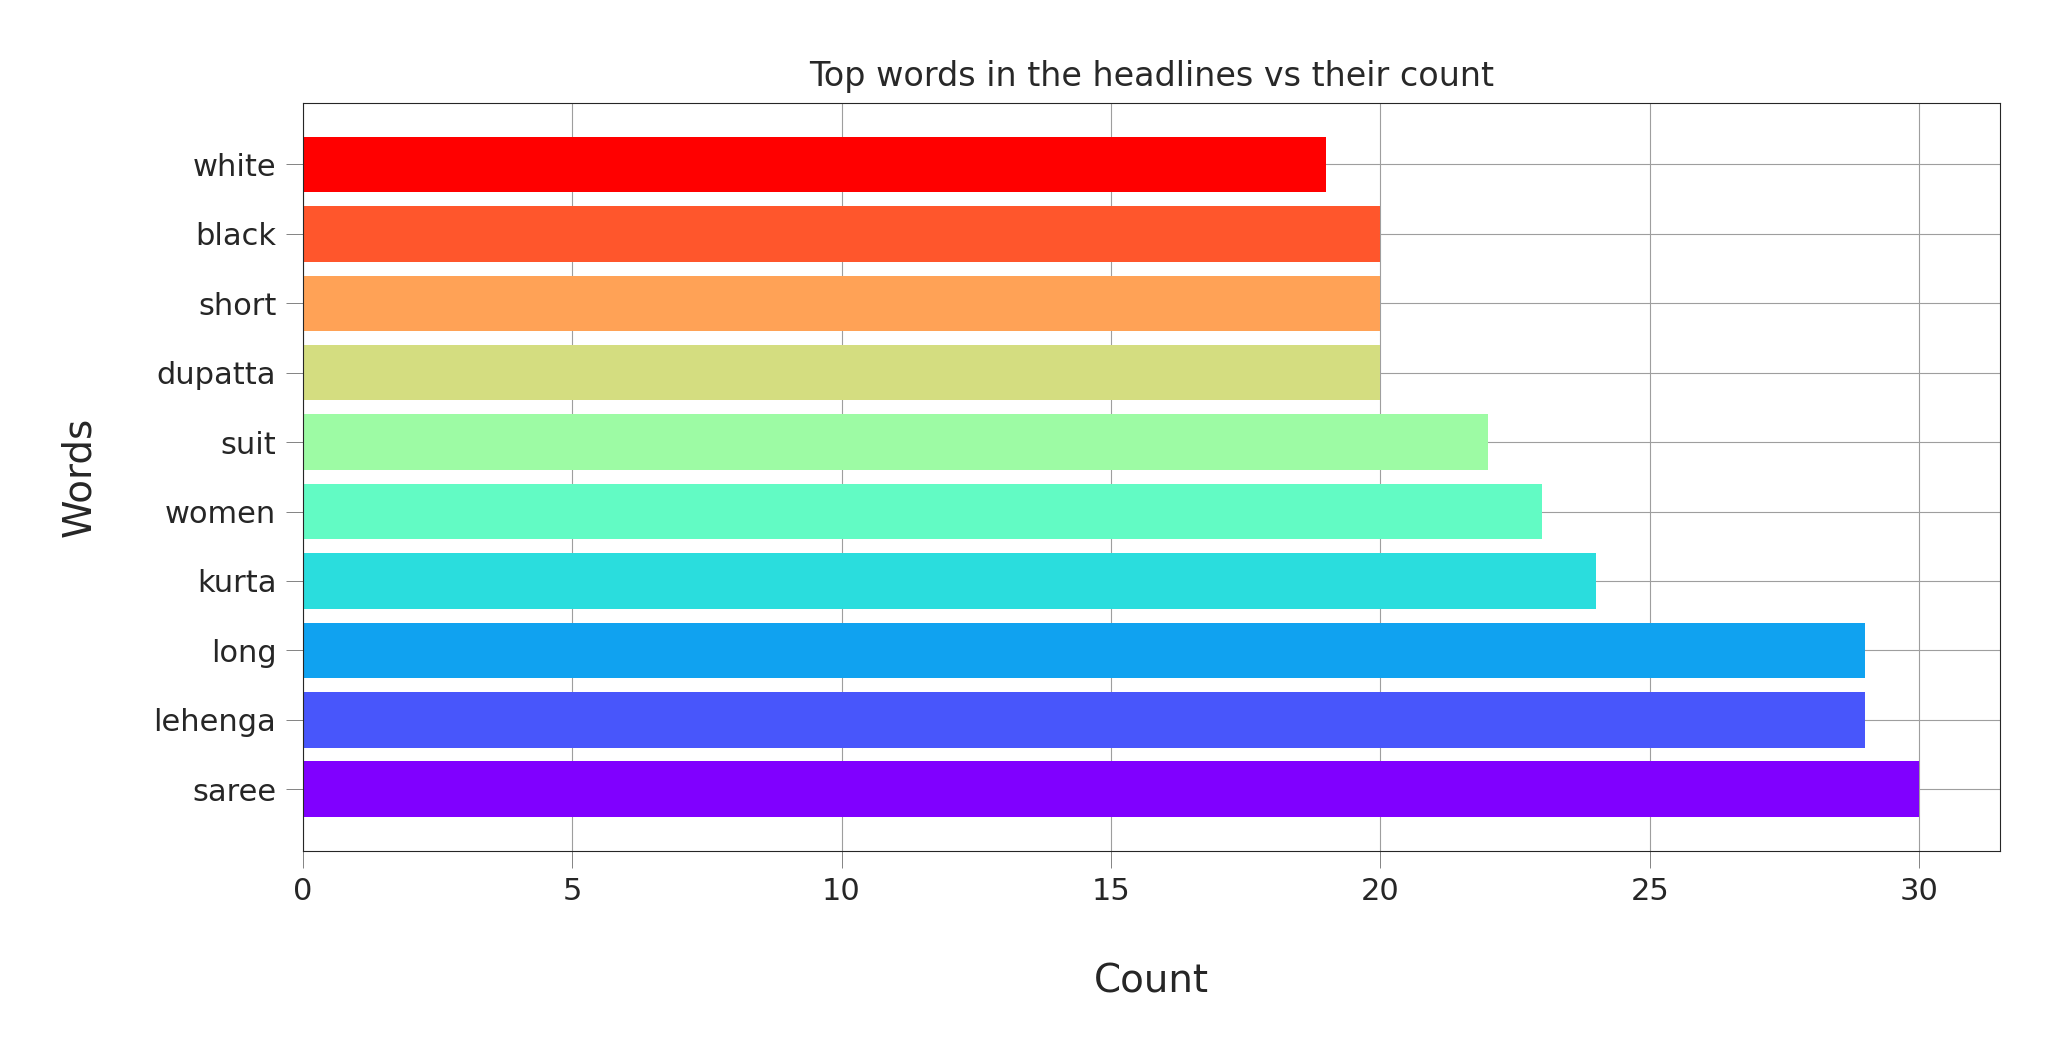

In [ ]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [ ]:
print(len(words))
words

10


['saree',
 'lehenga',
 'long',
 'kurta',
 'women',
 'suit',
 'dupatta',
 'short',
 'black',
 'white']

In [ ]:
arr=[]
for i in words:
    filt=df[df['post_Metadata'].str.contains("i")].index
    a=df.loc[filt]['likes']
    arr.append(a)
print(filt)
print(a)  

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,
            ...
            447, 449, 452, 453, 455, 456, 457, 460, 461, 462],
           dtype='int64', length=370)
0      15773
1      76728
2      55143
3      89229
4      97482
       ...  
456     1263
457      565
460     2971
461      335
462      300
Name: likes, Length: 370, dtype: int64


###likes count

In [ ]:
arr=[]
for i in range(len(filt)):
    a=int(df['likes'][filt[i]])
    arr.append(a)
print('Total Likes:',sum(arr))
print('Average Likes:',sum(arr)/i)
print('Top liked post:',max(arr))
print('least liked post:',min(arr))

Total Likes: 48965751
Average Likes: 132698.51219512196
Top liked post: 3700000
least liked post: 87


In [ ]:
print(arr)

[15773, 76728, 55143, 89229, 97482, 60150, 93161, 108778, 519500, 4656, 271000, 305551, 109978, 452000, 686343, 82345, 13604, 7377, 11480, 128304, 2365, 16700, 595482, 185265, 2320, 15468, 68734, 11686, 1857, 3404, 528430, 2808, 807525, 103347, 577581, 196851, 445411, 91534, 452413, 2490, 443316, 7309, 6075, 591497, 2766, 12530, 336546, 621369, 508708, 1001, 3565, 673410, 823119, 991000, 11213, 87, 330471, 324808, 1468, 2011, 291005, 9546, 682, 305, 1054, 1527, 34000, 1053, 353057, 2514, 2240, 1285, 367120, 2534, 1398, 260553, 1716, 1660, 265943, 1238, 322990, 3247232, 733962, 247547, 989918, 785535, 661991, 189207, 202089, 165062, 1800000, 2003, 1033094, 37342, 1900, 1080, 14300, 5731, 32581, 1189129, 221160, 708425, 3700000, 945795, 1178043, 528000, 2642, 840196, 34579, 4536, 1031317, 804052, 828443, 121656, 481878, 808479, 168654, 512310, 769685, 615540, 693203, 596010, 382524, 333557, 627330, 869715, 360247, 422543, 425075, 583409, 308267, 359, 440, 2048, 1182, 2184, 2317, 1798, 19

###Here the graph shows the likes for corresponding product
we conclude that product indexes with in range of 80-150 having most no.of likes
 

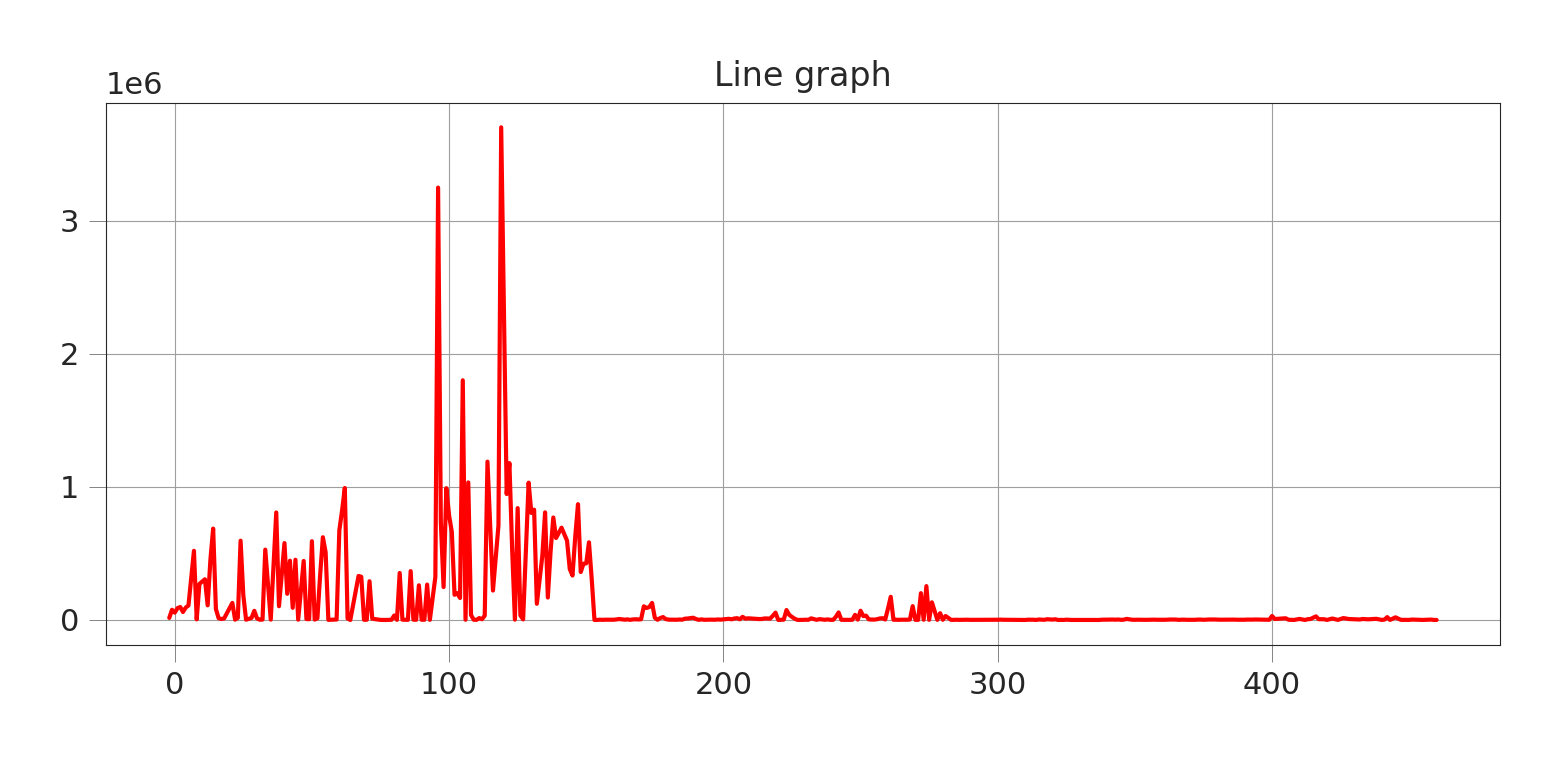

In [ ]:
plt.rcParams["figure.figsize"] =7.50, 3.50
plt.rcParams["figure.autolayout"] = True

productIndex= np.array(filt-2)
likes =np.array(arr)

plt.title("Line graph")
plt.plot(productIndex, likes, color="red")

plt.show()

##Mapping most trending products to FlipKart

In [ ]:
for i in words:
  print("https://www.flipkart.com/search?q=" + i)


https://www.flipkart.com/search?q=saree
https://www.flipkart.com/search?q=lehenga
https://www.flipkart.com/search?q=long
https://www.flipkart.com/search?q=kurta
https://www.flipkart.com/search?q=women
https://www.flipkart.com/search?q=suit
https://www.flipkart.com/search?q=dupatta
https://www.flipkart.com/search?q=short
https://www.flipkart.com/search?q=black
https://www.flipkart.com/search?q=white


In [ ]:
img_arr=arr
img_arr.sort()
print(img_arr)
print(img_arr[-1])

[87, 174, 195, 222, 236, 238, 255, 256, 267, 277, 297, 300, 305, 335, 357, 359, 359, 387, 440, 462, 565, 565, 576, 682, 685, 705, 757, 763, 827, 899, 912, 948, 958, 963, 963, 976, 1001, 1002, 1003, 1031, 1048, 1053, 1054, 1054, 1056, 1060, 1066, 1072, 1072, 1077, 1080, 1086, 1088, 1093, 1103, 1117, 1140, 1175, 1182, 1188, 1196, 1199, 1220, 1237, 1237, 1238, 1248, 1263, 1277, 1285, 1337, 1354, 1355, 1398, 1408, 1420, 1432, 1435, 1468, 1478, 1487, 1500, 1507, 1509, 1523, 1527, 1559, 1578, 1606, 1617, 1637, 1660, 1665, 1678, 1690, 1716, 1720, 1731, 1771, 1787, 1792, 1798, 1808, 1811, 1815, 1851, 1857, 1879, 1887, 1895, 1900, 1903, 1931, 1948, 1955, 1967, 1998, 2003, 2006, 2010, 2011, 2044, 2045, 2048, 2093, 2094, 2143, 2149, 2150, 2178, 2184, 2240, 2269, 2279, 2315, 2317, 2320, 2327, 2330, 2337, 2365, 2489, 2490, 2514, 2515, 2520, 2534, 2541, 2616, 2642, 2643, 2665, 2709, 2731, 2766, 2808, 2831, 2835, 2876, 2883, 2910, 2921, 2941, 2955, 2971, 3018, 3093, 3105, 3111, 3184, 3303, 3324, 3404

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


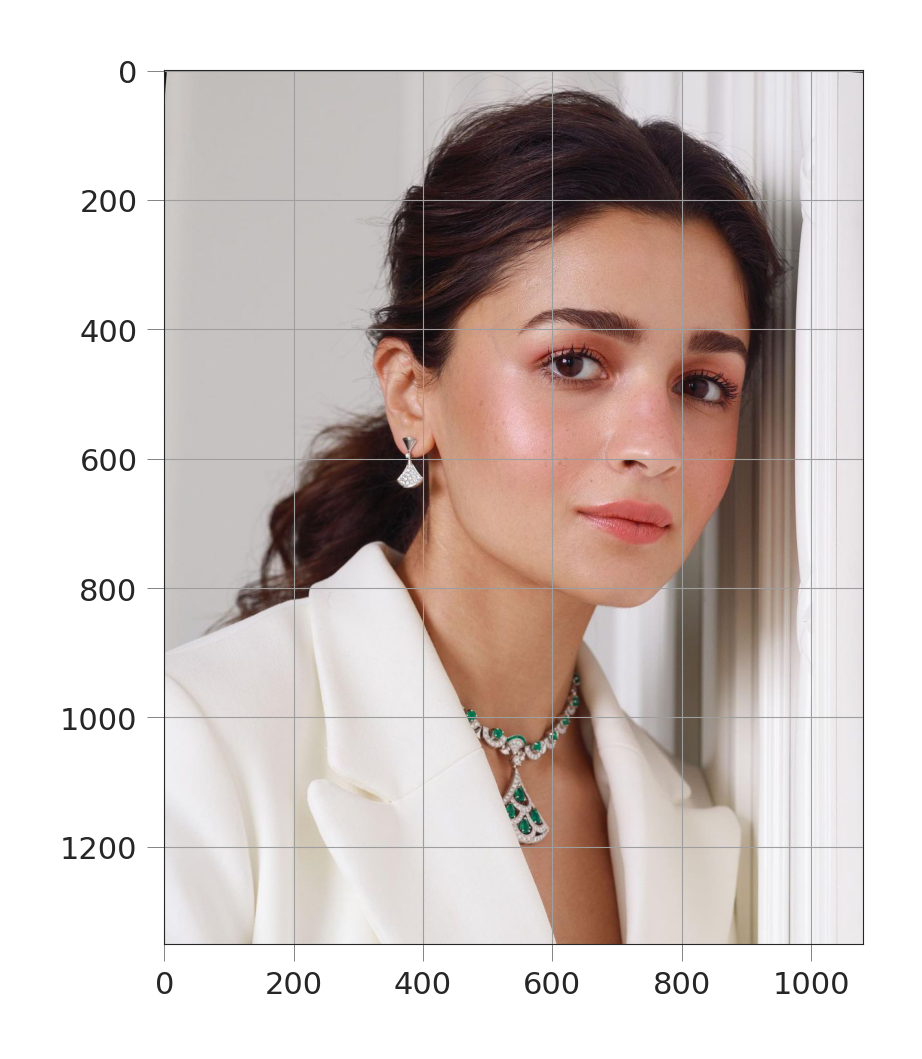

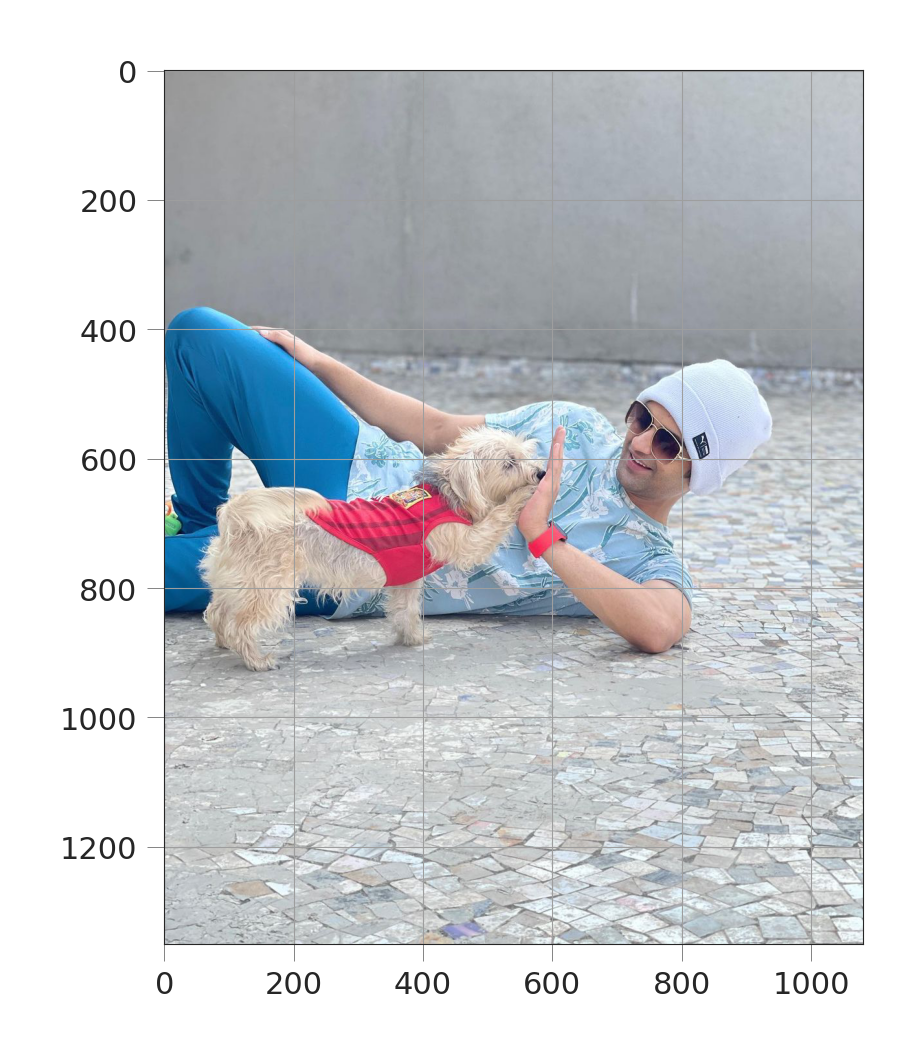

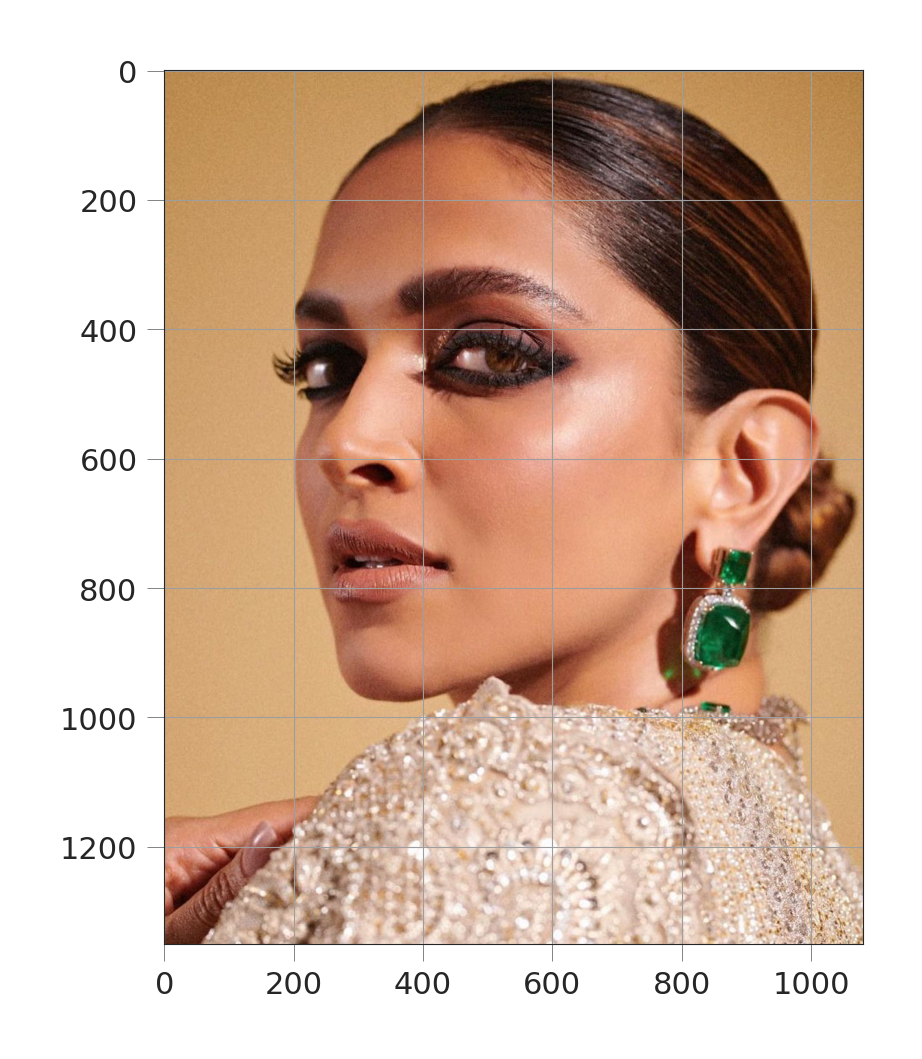

In [ ]:
ind1=df['IMAGE ID'][df[df['likes']==img_arr[-1]].index[0]]
ind2=df['IMAGE ID'][df[df['likes']==img_arr[-2]].index[0]]
ind3=df['IMAGE ID'][df[df['likes']==img_arr[-3]].index[0]]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def process(fn: str=None) -> None:
  image = mpimg.imread("/content/drive/MyDrive/imagesfk/"+ fn +".jpg")
  plt.figure(figsize=(5,5))
  plt.imshow(image)
for file in ind1,ind2,ind3:
  process(file)

##Conclusions
####1.We analyzed a dataset that contains information about social media trending posts for 540 days. The dataset was collected in 2020 2021 and 2022. It contains 458 entries.

####2.Model can show the category that has the largest number of trending prodcts and smallest number of trending prodcts
####3.can find when were the trending prodcts posted and on ""which days of the week"" and on ""which times of the day""

####4.the trending products from our model will help to display them on the homepage of flipkart 

####5.customers can view and can easily access the trending prodcts on the homepage of he flipkart 

####6.which will definitely increase the sales rate of flipkart.
